# Tunneling from SolveIt to your Machine

Let’s give a LLM a remote control to do anything on your computer!

Salman Naqvi  
Tuesday, 27 January 2026

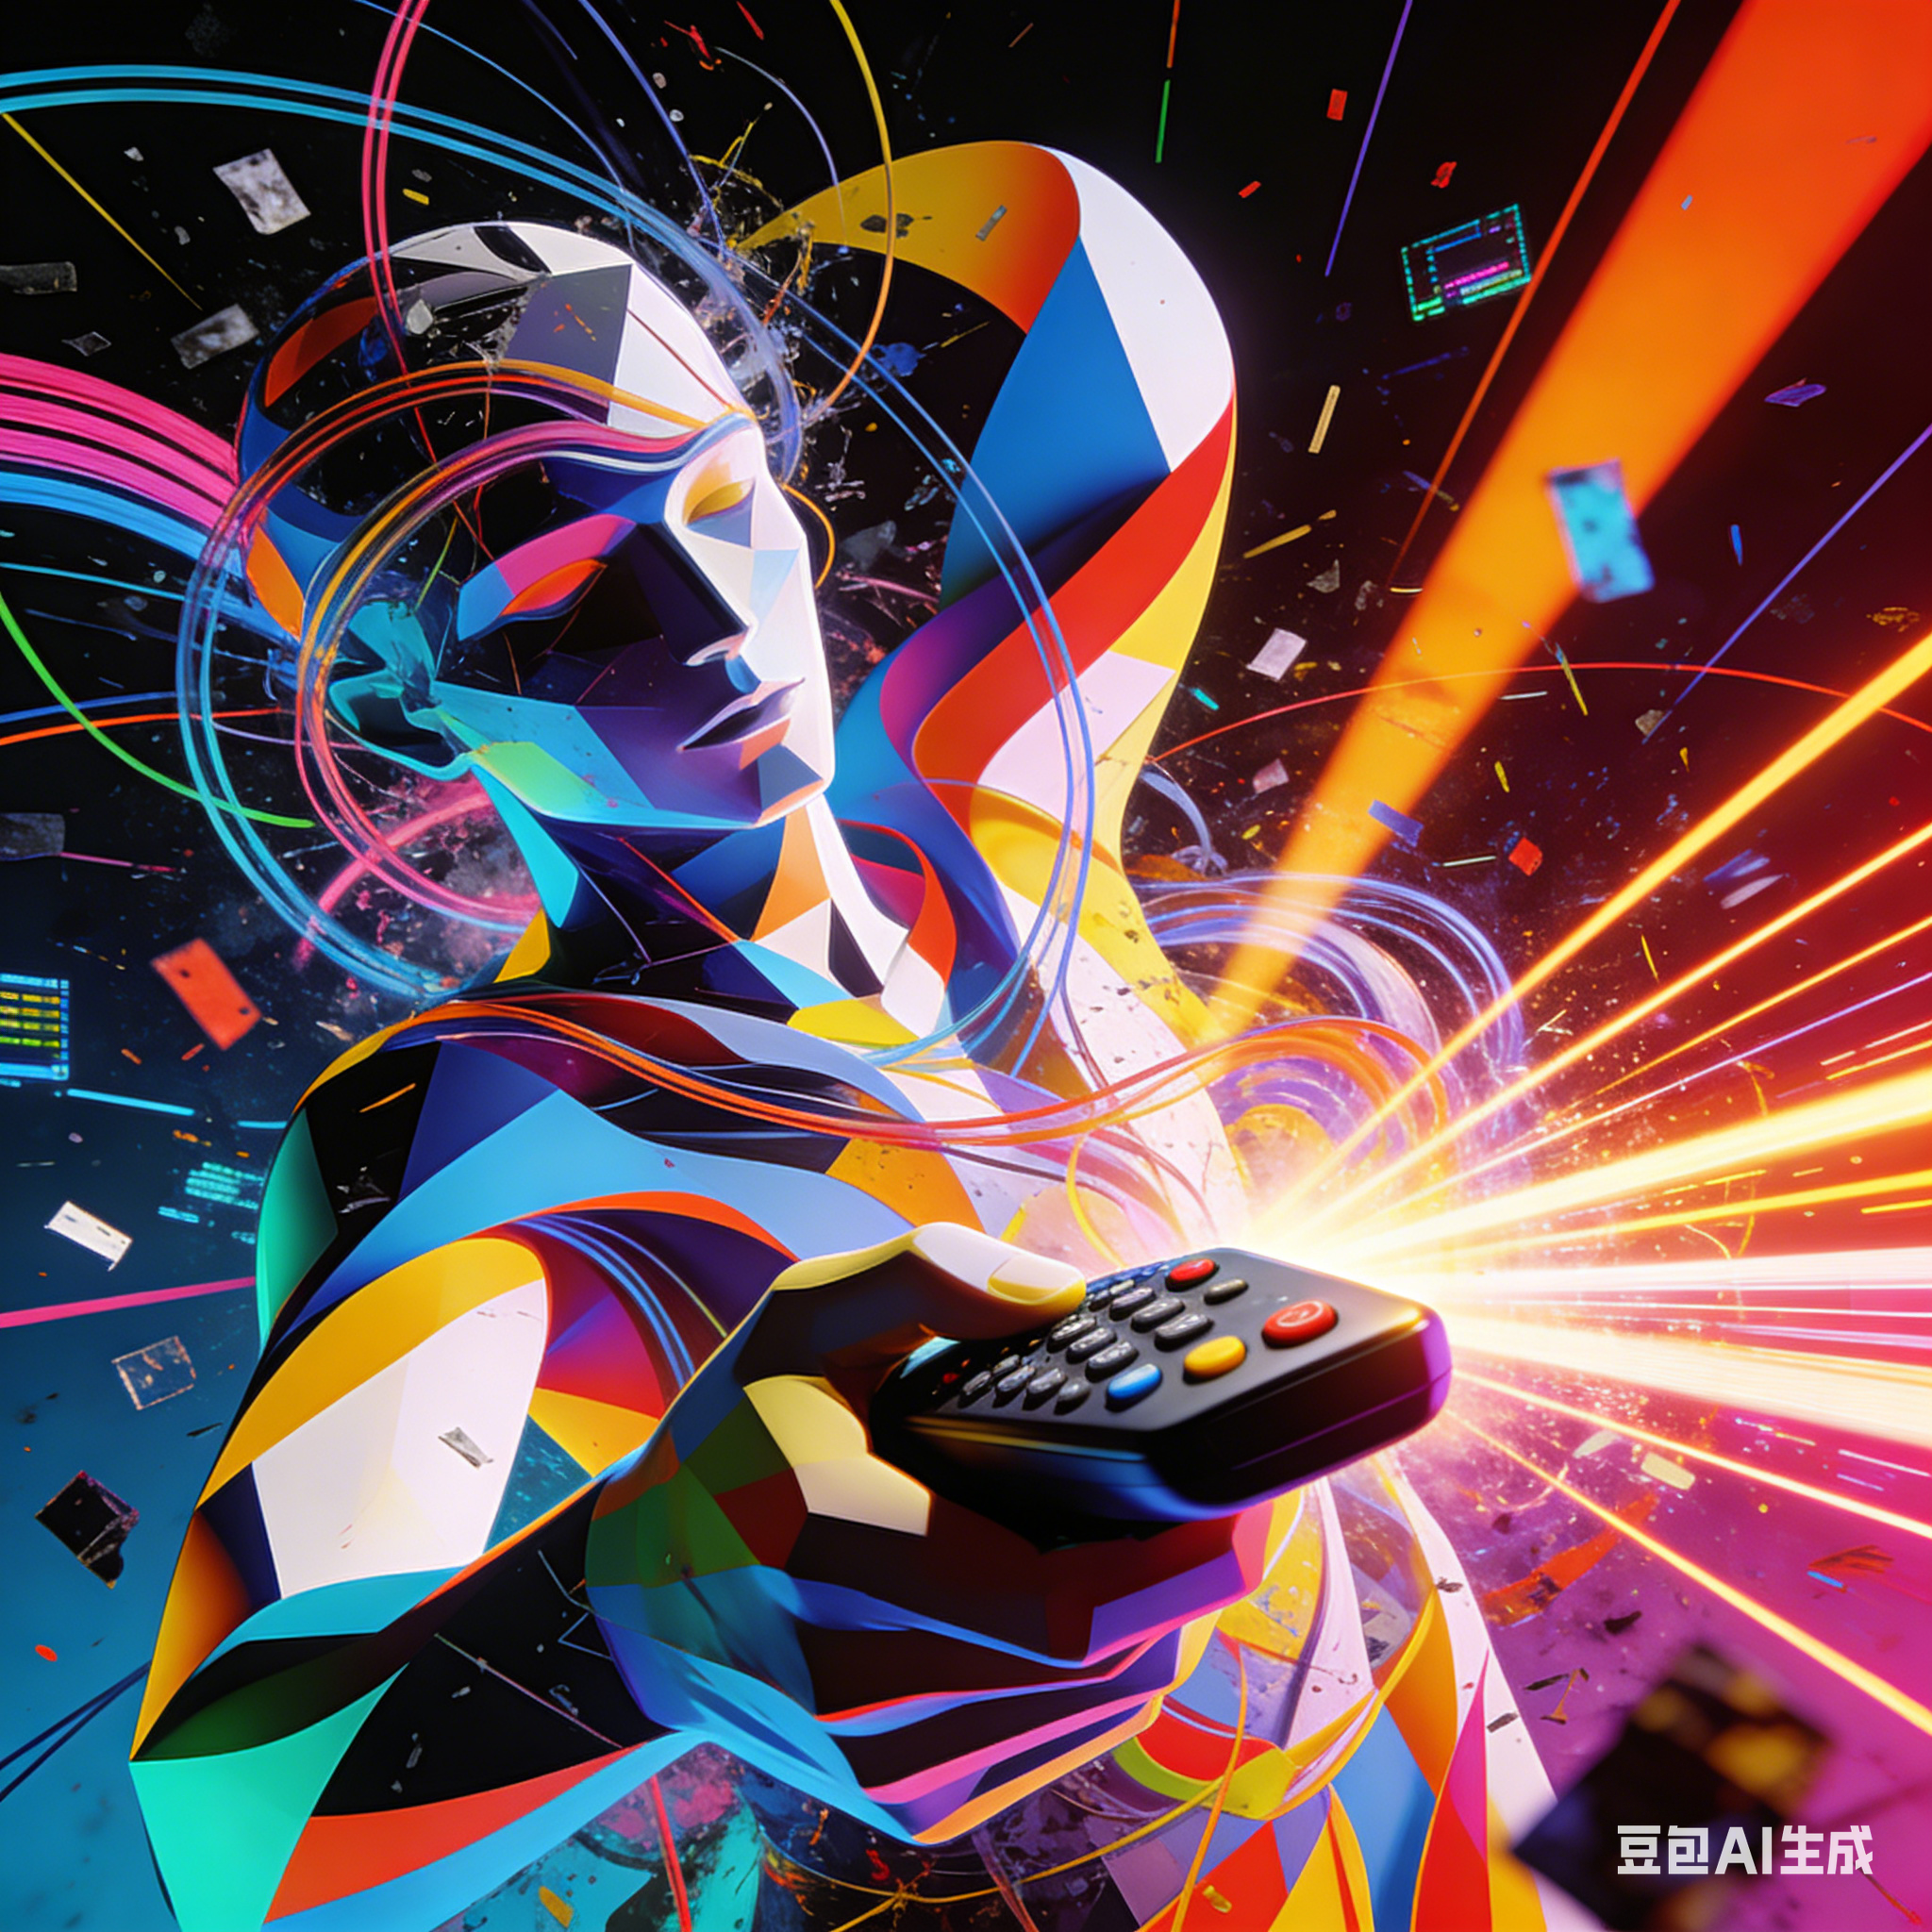

> **Note**
>
> This post notes down what was originally taught by Jeremy Howard in
> Lesson 7 of the [SolveIt course](solve.it.com) course led by [Jeremy
> Howard](https://solve.it.com/#im-jeremy-howard-from-fastai) who
> created the first modern LLM in 2018, and [Johnothan
> Whitaker](https://www.johnowhitaker.com/). SolveIt is also a brilliant
> problem-solving framework and interactive platform, that puts you in
> control–not the LLM.
>
> Also thanks to [Erik Zhang](https://www.ekzhang.com/) for his super
> simple to use [Bore](https://github.com/ekzhang/bore) library that
> makes it *really* easy to setup a tunnel between two computers.

This post details how one can provide SolveIt access to your local
machine, thereby giving the LLM in SolveIt the context of your computer.
Whilst the post focuses on macOS, the logic can be applied to other
systems.

This post walks through setting up the connection via
[Bore](https://github.com/ekzhang/bore) by [Erik
Zhang](https://www.ekzhang.com/), then wrapping it in a simple function
that either you can use, or that can be used as an LLM tool.

**What you’ll need to do:**

1.  Generate an SSH key on SolveIt
2.  Enable remote access on your Mac and add the public key
3.  Install `bore-cli` and `tmux` on your Mac
4.  Start a Bore tunnel exposing port 22
5.  Test the connection from SolveIt
6.  (Optional) Create a tool function for LLM use

## On SolveIt

We need to first setup SSH Key Authentication. On the SolveIt instance,
generate a new SSH key and note/copy the public key.

``` bash
ssh-keygen -t ed25519
cat ~/.ssh/id_ed25519.pub
```

`-t ed25519` generates a key using the `ed25519` algorithm. This is
supposedly safer, quicker, and a more concise alternative to the
traditional RSA algorithm.

## On Your Machine

First ensure that remote access is enabled in System Settings on your
local machine.

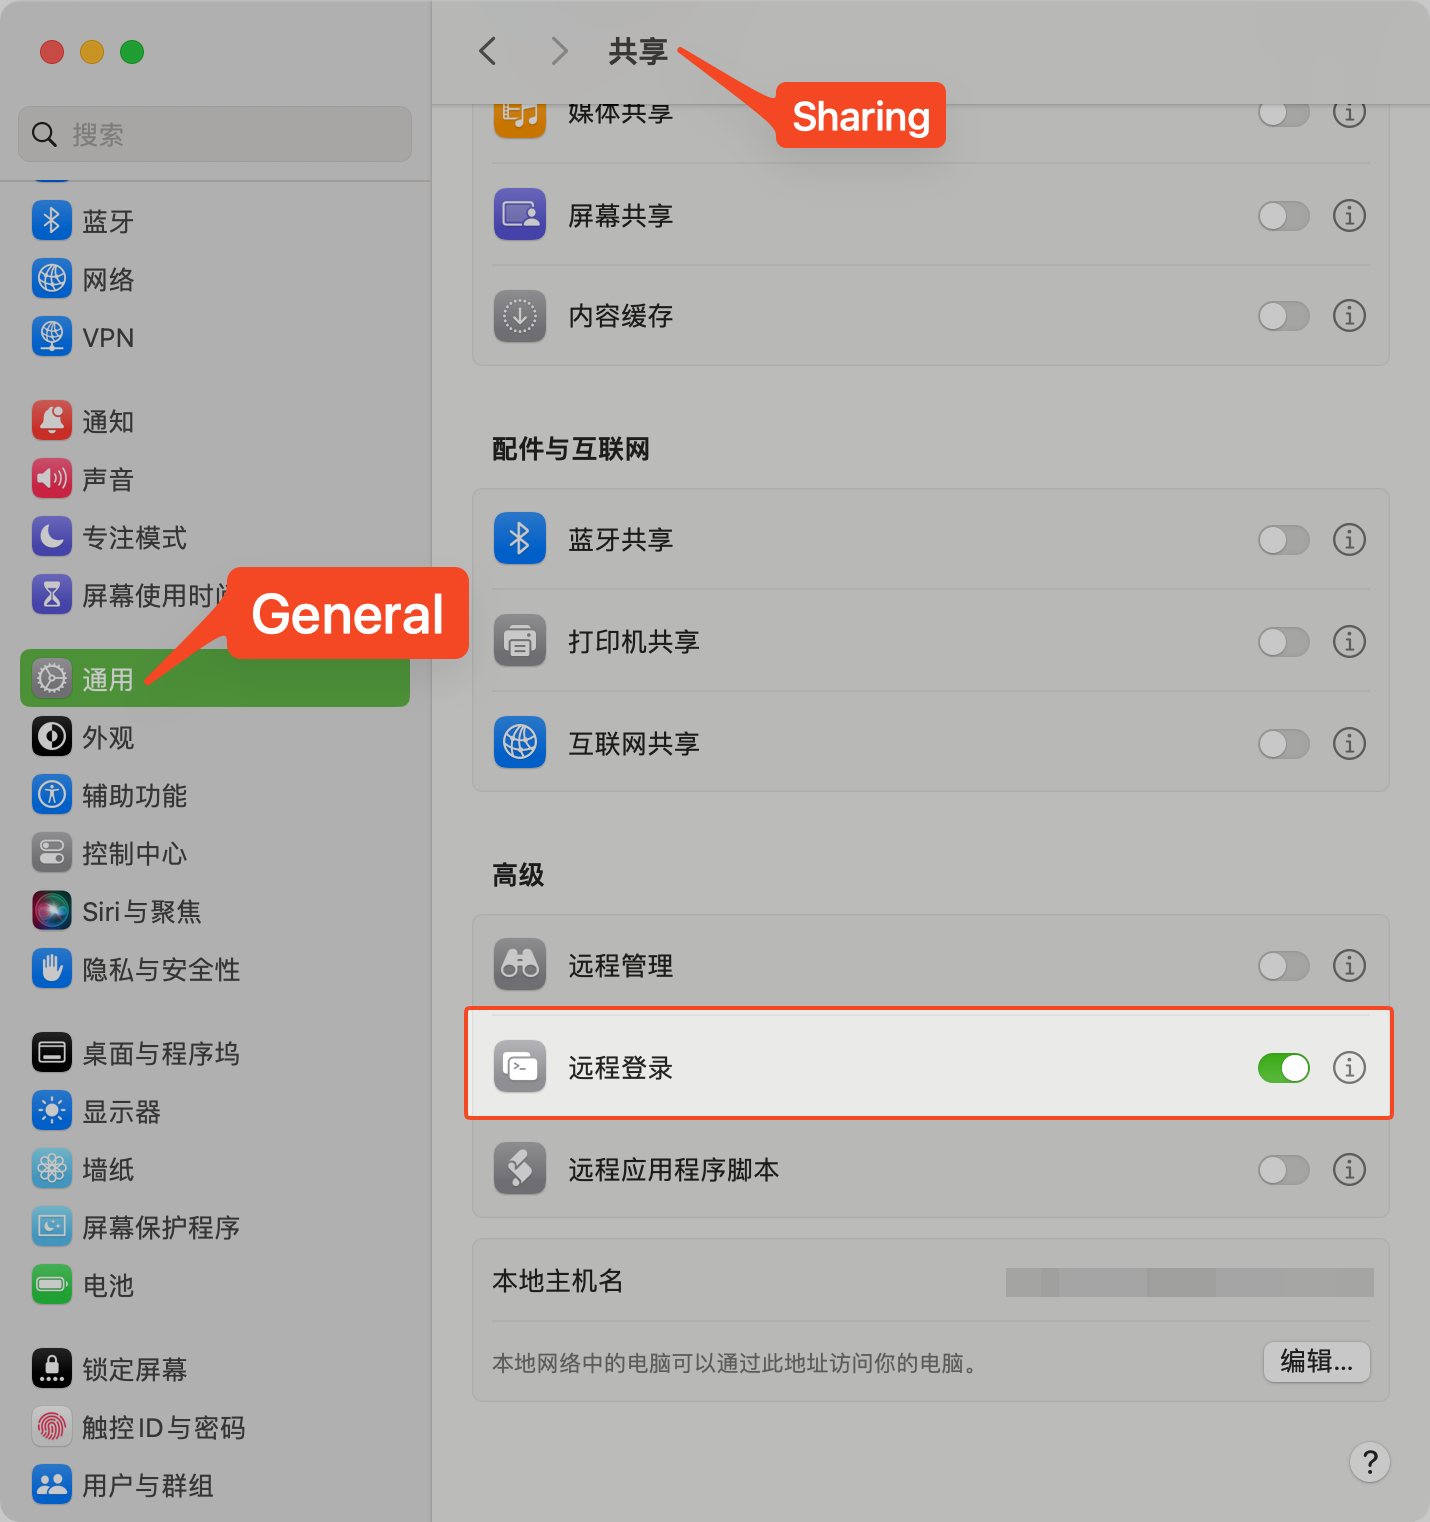

Next, install `bore-cli`. If you haven’t, also install `tmux` as it
helps keep SSH connections persistent.

``` bash
brew install bore-cli
brew install tmux
```

Then, start a new tmux session. Here, I’ve called the session `bore`.

``` bash
tmux new -s bore
```

Take the public key you generated on SolveIt. Then, on the local
machine, add it to the list of authorized keys.

``` bash
echo "YOUR_PUBLIC_KEY_HERE" >> ~/.ssh/authorized_keys
```

Now it’s time to run bore. Note down the port that bore returns.

``` bash
bore local 22 --to bore.pub
```

This command exposes port 22 on your local machine to the bore public
servers through an encrypted tunnel. Why 22? Because that is the default
port macOS uses for SSH after enabling remote access. The port you get
back is the port bore randomly allocates on its public servers.

## Testing the Connection from SolveIt

And that should be it! Test the connection from SolveIt:

``` bash
ssh -o StrictHostKeyChecking=no YOUR_USERNAME@bore.pub -p YOUR_PORT "echo Connection successful!"
```

If you are running this command outside a Jupyter Notebook or a SolveIt
Dialog, you can omit the `-o StrictHostKeyChecking=no` parameter. This
parameter allows us to bypass the prompt that asks us to verify the
connection.

fastcore has a `run_cmd` function we can use to abstract how we run
commands. We could also use it to produce a tool the LLM can use.

In [ ]:
from fastcore.all import *
?run_cmd

``` py
def mac(cmd:str, port:str): 
    "Execute bash commands on the user's local Mac."
    return print(run_cmd('ssh', f'salmannaqvi@bore.pub -p {port} {cmd}'))
```

Now you’re able to control your local machine directly from SolveIt. You
could also pass it as a tool to the LLM with `` &`mac` ``.

------------------------------------------------------------------------

If you have any comments, questions, suggestions, feedback, criticisms,
or corrections, please do post them down in the comment section below!